# Random Forest Regressor (RF)


We first import libraries and the transformed data.

In [1]:
#Standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
sns.set(style='whitegrid', palette='muted')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 8
import time

#Sklearn
from sklearn import metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestRegressor


In [2]:
# Imports data
x = pd.read_csv('x.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
x

,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,IPDCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
sasdate,,,,,,,,,,,,,,,,,,,,,
1992-01-04,0.373032,0.275060,0.083938,0.664201,0.601652,0.769184,0.748975,0.760298,0.940532,1.843950,...,-0.215571,0.077728,0.083014,-0.583570,0.175899,1.2,3.714687,-0.584329,0.134978,16.1885
1992-01-05,0.532885,0.549297,0.514589,-0.873850,0.546742,0.324748,0.546363,0.580914,0.647050,3.074505,...,0.097556,-0.255295,-0.251432,-0.072648,-0.088998,2.0,-5.294144,0.020679,0.410802,14.7280
1992-01-06,0.417254,0.444719,0.269590,1.048664,0.280383,0.059695,-0.239920,-0.304895,-0.484071,-1.398611,...,0.318864,0.023712,0.250035,0.795664,-0.088298,1.2,4.562073,0.881246,-0.087417,14.7531
1992-01-07,-0.079646,-0.134642,0.334203,1.330298,0.708002,0.893837,0.995847,1.126762,1.294361,2.614598,...,-0.233369,0.264845,-0.416910,-1.518733,-0.000307,-3.8,-0.352309,-0.854378,0.216749,13.3036
1992-01-08,0.386454,0.380539,0.246840,-1.603560,0.324124,-0.549192,-0.106279,-0.111965,0.036867,-0.863906,...,-0.032213,-0.285966,0.499100,1.157537,0.086992,-0.5,-0.633643,1.163376,0.042164,14.4223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-12,-0.013781,-0.019171,-0.193846,1.490076,-0.719328,-1.550613,-1.202485,-0.846966,-0.623823,-1.031771,...,-0.613838,0.175427,-0.107940,0.300155,-0.590025,2.9,-0.283245,-0.123254,0.880929,21.7702
2023-01-01,0.087570,0.130699,1.316033,0.190398,2.764501,1.003181,0.343776,-0.014901,-0.334291,0.217564,...,1.425376,0.033243,0.170724,-0.004386,0.309575,5.2,0.071035,0.049043,-0.142513,20.2269
2023-01-02,0.103913,-0.004103,-0.028459,-0.417590,-0.660515,-0.005561,-0.196666,-0.129562,0.097723,0.212525,...,-0.416042,-0.224790,-0.417543,-0.152983,-0.621376,2.1,-0.237727,-0.068985,-0.121427,20.2141


In [3]:
y = pd.read_csv('y.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
print(y.shape)
y = y.iloc[:,0]
y

(373, 1)


sasdate
1992-01-05    0.214977
1992-01-06    0.285919
1992-01-07    0.285104
1992-01-08    0.213295
1992-01-09    0.212842
                ...   
2023-01-01    0.515742
2023-01-02    0.369323
2023-01-03    0.053028
2023-01-04    0.367109
2023-01-05    0.124049
Name: Inflation, Length: 373, dtype: float64

In [4]:
y.index = pd.DatetimeIndex(y.index).strftime("%d-%y")


Text(0.5, 1.0, 'Actual inflation rates')

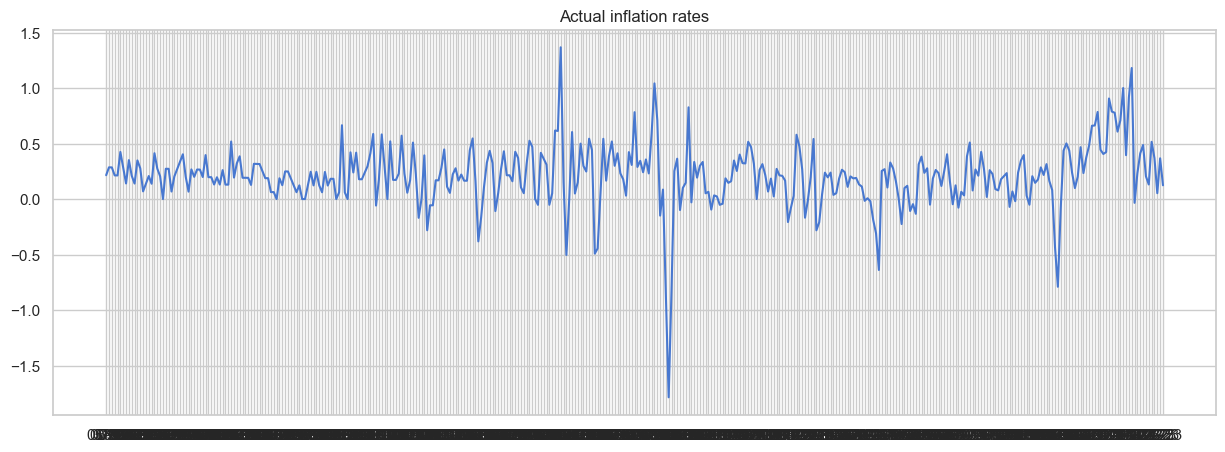

In [5]:

fig = plt.figure(figsize=(15, 5))
plt.plot(y)
plt.grid(True)
plt.title('Actual inflation rates')


In [6]:
y = pd.read_csv('y.csv', header=0, index_col=0, parse_dates=True, infer_datetime_format=True)
print(y.shape)
y = y.iloc[:,0]
y

(373, 1)


sasdate
1992-01-05    0.214977
1992-01-06    0.285919
1992-01-07    0.285104
1992-01-08    0.213295
1992-01-09    0.212842
                ...   
2023-01-01    0.515742
2023-01-02    0.369323
2023-01-03    0.053028
2023-01-04    0.367109
2023-01-05    0.124049
Name: Inflation, Length: 373, dtype: float64

In [7]:
y.reset_index() #prepare y for the remaining steps 

,sasdate,Inflation
0,1992-01-05,0.214977
1,1992-01-06,0.285919
2,1992-01-07,0.285104
3,1992-01-08,0.213295
4,1992-01-09,0.212842
...,...,...
368,2023-01-01,0.515742
369,2023-01-02,0.369323
370,2023-01-03,0.053028
371,2023-01-04,0.367109


## PCA

n_components: 1    variance explained: 0.223
n_components: 2    variance explained: 0.313
n_components: 3    variance explained: 0.390
n_components: 4    variance explained: 0.450
n_components: 5    variance explained: 0.491
n_components: 6    variance explained: 0.527
n_components: 7    variance explained: 0.555
n_components: 8    variance explained: 0.580
n_components: 9    variance explained: 0.602
n_components: 10    variance explained: 0.623
n_components: 11    variance explained: 0.643
n_components: 12    variance explained: 0.661
n_components: 13    variance explained: 0.678
n_components: 14    variance explained: 0.695
n_components: 15    variance explained: 0.710
n_components: 16    variance explained: 0.723
n_components: 17    variance explained: 0.737
n_components: 18    variance explained: 0.749
n_components: 19    variance explained: 0.761
n_components: 20    variance explained: 0.773
n_components: 30    variance explained: 0.859
n_components: 40    variance explained: 0.9

Text(0.5, 1.0, 'Elbow curve')

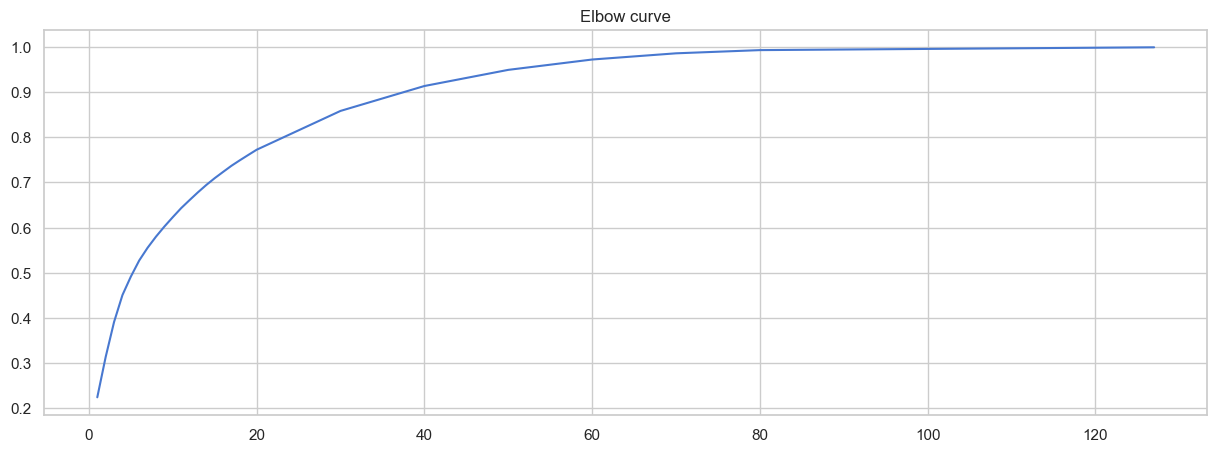

In [16]:
#select a suitable number of components for PCA
n_trial = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50,60,70,80,127]
distorsions = []

for n_comp in n_trial:

    steps_X = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = n_comp, random_state=1))]
    
    pl_pca_X = Pipeline(steps_X)
    X_pca_model = pl_pca_X.fit(x)
    
    distorsions.append(X_pca_model.steps[1][1].explained_variance_ratio_.sum())
    
    print('n_components:', n_comp, '  ', 'variance explained:', '%.3f' %X_pca_model.steps[1][1].explained_variance_ratio_.sum())
    
fig = plt.figure(figsize=(15, 5))
plt.plot(n_trial, distorsions)
plt.grid(True)
plt.title('Elbow curve')


As shown, 20 to 40 is a reason number of components to be used. 

n_components: 1    variance explained: 0.223
n_components: 10    variance explained: 0.623
n_components: 20    variance explained: 0.773
n_components: 22    variance explained: 0.794
n_components: 24    variance explained: 0.813
n_components: 26    variance explained: 0.830
n_components: 28    variance explained: 0.845
n_components: 30    variance explained: 0.859
n_components: 32    variance explained: 0.872
n_components: 34    variance explained: 0.884
n_components: 36    variance explained: 0.895
n_components: 38    variance explained: 0.905
n_components: 40    variance explained: 0.914


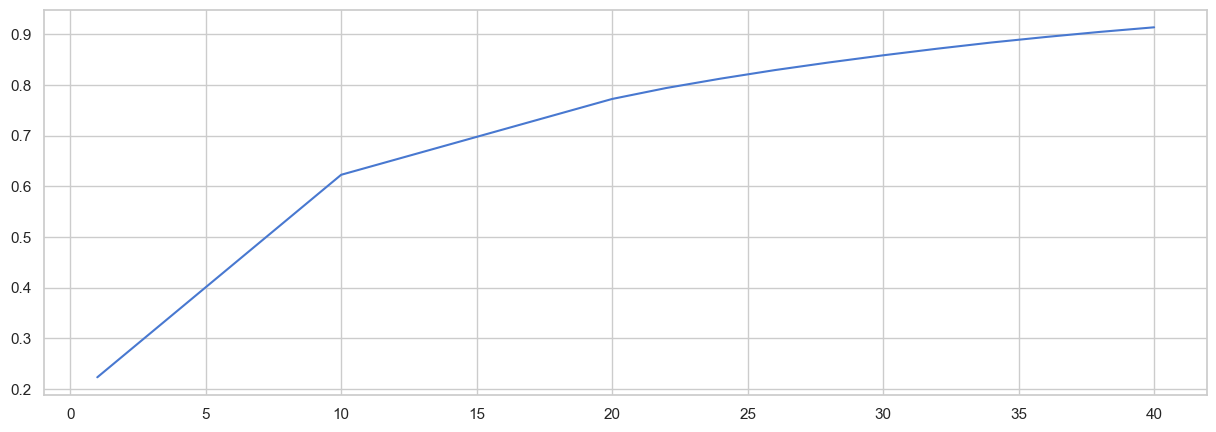

In [17]:
#fine-tune the number of components 
n_trial = [1,10,20,22,24,26,28,30,32,34,36,38,40]
distorsions = []

for n_comp in n_trial:

    steps_X = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
               ('pca', PCA(n_components = n_comp, random_state=1))]
    
    pl_pca_X = Pipeline(steps_X)
    X_pca_model = pl_pca_X.fit(x)
    
    distorsions.append(X_pca_model.steps[1][1].explained_variance_ratio_.sum())
    
    print('n_components:', n_comp, '  ', 'variance explained:', '%.3f' %X_pca_model.steps[1][1].explained_variance_ratio_.sum())
    
fig = plt.figure(figsize=(15, 5))
plt.plot(n_trial, distorsions)
plt.grid(True)



I think 22 components can already explain enough original variance (almost 80%). Therefore, in the following grid search, I will not consider more than 22 principle components. 

## Grid Search for Optimal Hyperparameters

In [21]:
n_train = int(len(x)*0.7)   #use 70% for train
n_records = len(x)
n_forecast = n_records-n_train

j = 0
for i in range(n_train, n_records):    
    train, test = x[j:i], x[i:i+1]   #rolling window
    j += 1

In [22]:
# pipeline
def pipeline(config):

    # unpack config
    n_trees, n_comps, max_d, min_l, max_f = config

    # Steps
    steps = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
             ('pca', PCA(n_components=n_comps, random_state=1)),
             ('rfr', RandomForestRegressor(n_estimators=n_trees, max_depth=max_d, min_samples_leaf=min_l, max_features=max_f, random_state=1))
            ]

    pipeline = Pipeline(steps)

    return pipeline



In [23]:
def walk_forward_validation(cfg):
    
    n_train = int(len(x)*0.7) 

    n_records = len(x)

    y_test_list = []

    y_pred_list = []

    j = 0

    for i in range(n_train, n_records):
    
        X_train, X_test, y_train, y_test = x[j:i], x[i:i+1], y[j:i], y[i:i+1]
       
        model = pipeline(cfg).fit(X_train, y_train)      
    
        y_pred = model.predict(X_test)

        y_pred_list.extend(y_pred)
       
        y_test_list.extend(y_test)
    
        j += 1
    
    score_rmse = metrics.mean_squared_error(y_test_list, y_pred_list, squared=False)
    
    print(' > %.3f' % score_rmse)
    
    return score_rmse 

In [24]:
# score a model, return None on failure
def repeat_evaluate(config, n_repeats=1):
    # convert config to a key
    key = str(config)
    # fit and evaluate the model n times
    scores = [walk_forward_validation(config) for _ in range(n_repeats)]
    # summarize score
    result = np.mean(scores)
    print('> Model[%s] %.3f' % (key, result))
    return (key, result)

In [25]:
# grid search configs
def grid_search(cfg_list):
    # evaluate configs
    scores = [repeat_evaluate(cfg) for cfg in cfg_list]
    # sort configs by score_rmse, asc
    #scores.sort(key=lambda tup: tup[1])
    scores.sort(key=lambda tup: tup[1], reverse=True)
    return scores

In [13]:
# create a list of configs to try
def model_configs():
    # define scope of configs
    
    #Hyperparameters for RF
    #n_estimators=n_trees, max_depth=max_d, min_samples_leaf=min_l, max_features=max_f
    n_trees = [100,300,400,500]
    max_d = [None,5,10]
    min_l = [1,2]
    max_f = [1.0,0.7,0.3]
    
    #Hyperparameters for PCA: number of principle components 
    n_comps = [8,10,12,14,16,18,20,22]

    # create configs
    configs = list()
    for i in n_trees:
        for j in n_comps:
            for d in max_d:
                for l in min_l:
                    for f in max_f:
                        cfg = [i, j, d, l, f]
                        configs.append(cfg)
    print('Total configs: %d' % len(configs))
    return configs

In [14]:
cfg_list = model_configs()
# grid search
scores = grid_search(cfg_list)
print('done')

Total configs: 576
 > 0.280
> Model[[100, 8, None, 1, 1.0]] 0.280
 > 0.289
> Model[[100, 8, None, 1, 0.7]] 0.289
 > 0.289
> Model[[100, 8, None, 1, 0.3]] 0.289
 > 0.289
> Model[[100, 8, None, 2, 1.0]] 0.289
 > 0.288
> Model[[100, 8, None, 2, 0.7]] 0.288
 > 0.290
> Model[[100, 8, None, 2, 0.3]] 0.290
 > 0.287
> Model[[100, 8, 5, 1, 1.0]] 0.287
 > 0.289
> Model[[100, 8, 5, 1, 0.7]] 0.289
 > 0.287
> Model[[100, 8, 5, 1, 0.3]] 0.287
 > 0.288
> Model[[100, 8, 5, 2, 1.0]] 0.288
 > 0.288
> Model[[100, 8, 5, 2, 0.7]] 0.288
 > 0.289
> Model[[100, 8, 5, 2, 0.3]] 0.289
 > 0.281
> Model[[100, 8, 10, 1, 1.0]] 0.281
 > 0.289
> Model[[100, 8, 10, 1, 0.7]] 0.289
 > 0.294
> Model[[100, 8, 10, 1, 0.3]] 0.294
 > 0.286
> Model[[100, 8, 10, 2, 1.0]] 0.286
 > 0.291
> Model[[100, 8, 10, 2, 0.7]] 0.291
 > 0.288
> Model[[100, 8, 10, 2, 0.3]] 0.288
 > 0.283
> Model[[100, 10, None, 1, 1.0]] 0.283
 > 0.282
> Model[[100, 10, None, 1, 0.7]] 0.282
 > 0.285
> Model[[100, 10, None, 1, 0.3]] 0.285
 > 0.287
> Model[[100

 > 0.289
> Model[[300, 10, 10, 2, 0.7]] 0.289
 > 0.292
> Model[[300, 10, 10, 2, 0.3]] 0.292
 > 0.291
> Model[[300, 12, None, 1, 1.0]] 0.291
 > 0.289
> Model[[300, 12, None, 1, 0.7]] 0.289
 > 0.295
> Model[[300, 12, None, 1, 0.3]] 0.295
 > 0.293
> Model[[300, 12, None, 2, 1.0]] 0.293
 > 0.298
> Model[[300, 12, None, 2, 0.7]] 0.298
 > 0.299
> Model[[300, 12, None, 2, 0.3]] 0.299
 > 0.289
> Model[[300, 12, 5, 1, 1.0]] 0.289
 > 0.290
> Model[[300, 12, 5, 1, 0.7]] 0.290
 > 0.296
> Model[[300, 12, 5, 1, 0.3]] 0.296
 > 0.293
> Model[[300, 12, 5, 2, 1.0]] 0.293
 > 0.295
> Model[[300, 12, 5, 2, 0.7]] 0.295
 > 0.301
> Model[[300, 12, 5, 2, 0.3]] 0.301
 > 0.291
> Model[[300, 12, 10, 1, 1.0]] 0.291
 > 0.290
> Model[[300, 12, 10, 1, 0.7]] 0.290
 > 0.295
> Model[[300, 12, 10, 1, 0.3]] 0.295
 > 0.294
> Model[[300, 12, 10, 2, 1.0]] 0.294
 > 0.297
> Model[[300, 12, 10, 2, 0.7]] 0.297
 > 0.301
> Model[[300, 12, 10, 2, 0.3]] 0.301
 > 0.290
> Model[[300, 14, None, 1, 1.0]] 0.290
 > 0.290
> Model[[300, 14,

 > 0.288
> Model[[400, 14, 10, 1, 0.3]] 0.288
 > 0.290
> Model[[400, 14, 10, 2, 1.0]] 0.290
 > 0.290
> Model[[400, 14, 10, 2, 0.7]] 0.290
 > 0.295
> Model[[400, 14, 10, 2, 0.3]] 0.295
 > 0.293
> Model[[400, 16, None, 1, 1.0]] 0.293
 > 0.291
> Model[[400, 16, None, 1, 0.7]] 0.291
 > 0.301
> Model[[400, 16, None, 1, 0.3]] 0.301
 > 0.294
> Model[[400, 16, None, 2, 1.0]] 0.294
 > 0.296
> Model[[400, 16, None, 2, 0.7]] 0.296
 > 0.298
> Model[[400, 16, None, 2, 0.3]] 0.298
 > 0.293
> Model[[400, 16, 5, 1, 1.0]] 0.293
 > 0.292
> Model[[400, 16, 5, 1, 0.7]] 0.292
 > 0.303
> Model[[400, 16, 5, 1, 0.3]] 0.303
 > 0.293
> Model[[400, 16, 5, 2, 1.0]] 0.293
 > 0.295
> Model[[400, 16, 5, 2, 0.7]] 0.295
 > 0.299
> Model[[400, 16, 5, 2, 0.3]] 0.299
 > 0.294
> Model[[400, 16, 10, 1, 1.0]] 0.294
 > 0.291
> Model[[400, 16, 10, 1, 0.7]] 0.291
 > 0.299
> Model[[400, 16, 10, 1, 0.3]] 0.299
 > 0.294
> Model[[400, 16, 10, 2, 1.0]] 0.294
 > 0.297
> Model[[400, 16, 10, 2, 0.7]] 0.297
 > 0.298
> Model[[400, 16, 1

 > 0.290
> Model[[500, 18, 10, 1, 1.0]] 0.290
 > 0.288
> Model[[500, 18, 10, 1, 0.7]] 0.288
 > 0.292
> Model[[500, 18, 10, 1, 0.3]] 0.292
 > 0.291
> Model[[500, 18, 10, 2, 1.0]] 0.291
 > 0.291
> Model[[500, 18, 10, 2, 0.7]] 0.291
 > 0.294
> Model[[500, 18, 10, 2, 0.3]] 0.294
 > 0.290
> Model[[500, 20, None, 1, 1.0]] 0.290
 > 0.287
> Model[[500, 20, None, 1, 0.7]] 0.287
 > 0.293
> Model[[500, 20, None, 1, 0.3]] 0.293
 > 0.293
> Model[[500, 20, None, 2, 1.0]] 0.293
 > 0.292
> Model[[500, 20, None, 2, 0.7]] 0.292
 > 0.297
> Model[[500, 20, None, 2, 0.3]] 0.297
 > 0.289
> Model[[500, 20, 5, 1, 1.0]] 0.289
 > 0.290
> Model[[500, 20, 5, 1, 0.7]] 0.290
 > 0.294
> Model[[500, 20, 5, 1, 0.3]] 0.294
 > 0.292
> Model[[500, 20, 5, 2, 1.0]] 0.292
 > 0.292
> Model[[500, 20, 5, 2, 0.7]] 0.292
 > 0.297
> Model[[500, 20, 5, 2, 0.3]] 0.297
 > 0.291
> Model[[500, 20, 10, 1, 1.0]] 0.291
 > 0.287
> Model[[500, 20, 10, 1, 0.7]] 0.287
 > 0.293
> Model[[500, 20, 10, 1, 0.3]] 0.293
 > 0.293
> Model[[500, 20, 1

In [15]:
scores

[('[100, 12, 10, 2, 0.3]', 0.3064993247098772),
 ('[100, 16, None, 2, 0.3]', 0.3062230163275527),
 ('[100, 12, 5, 2, 0.3]', 0.3055950231261708),
 ('[100, 22, 10, 1, 0.3]', 0.3054628693957283),
 ('[100, 22, None, 1, 0.3]', 0.30421564676648694),
 ('[300, 16, 5, 1, 0.3]', 0.30401711442635293),
 ('[100, 16, 5, 1, 0.3]', 0.30398450950290956),
 ('[400, 16, 5, 1, 0.3]', 0.30333085020838935),
 ('[100, 16, 5, 2, 0.3]', 0.3029712528923726),
 ('[500, 16, 5, 1, 0.3]', 0.3026519164660656),
 ('[100, 12, None, 2, 0.3]', 0.302541653169043),
 ('[100, 22, 5, 1, 0.3]', 0.3024533317802686),
 ('[100, 16, None, 1, 0.3]', 0.301557778986673),
 ('[500, 12, 5, 2, 0.3]', 0.3013736607040443),
 ('[400, 16, None, 1, 0.3]', 0.3013684476587587),
 ('[300, 12, 5, 2, 0.3]', 0.3011369948763788),
 ('[500, 22, None, 2, 0.3]', 0.30090900373019563),
 ('[300, 12, 10, 2, 0.3]', 0.3008415389800441),
 ('[100, 22, None, 2, 1.0]', 0.3008014610475889),
 ('[100, 16, 10, 2, 0.3]', 0.3007502816707544),
 ('[400, 12, 10, 2, 0.3]', 0.300

The best model is the one with lowest RMSE, i.e. the one at the bottom of the "socres" list.

We find the optimised hyperparameters to be [100, 8, None, 1, 1.0].

## Final model

Now, we implement the RF with optimial hyperparameters again.

In [8]:
start=time.time()   

steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('pca', PCA(n_components=8, random_state=1)),
                 ('rfr', RandomForestRegressor(n_estimators=100, max_depth=None, 
                                               min_samples_leaf=1, max_features=1.0, random_state=1))
                ]

pipeline_final = Pipeline(steps_final)

n_train = int(len(x)*0.7)  

n_records = len(x)

y_test_list = []
    
y_pred_list = []

train_error = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = x[j:i], x[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    
    train_error.append(metrics.mean_squared_error(y_train, y_train_pred, squared=False))

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1

print("done")

end=time.time()

print("Running Time:", end - start)

print("Training RMSE: ", np.mean(train_error))

done
Running Time: 72.66808414459229
Training RMSE:  0.09608751220811117


In [9]:
n_forecast = n_records-n_train
pd.options.display.max_rows=300
result = pd.DataFrame({'Actual':y_test_list, 'Predicted': y_pred_list}, columns=['Actual', 'Predicted'])
result

,Actual,Predicted
0,0.110017,0.210395
1,0.203997,0.178775
2,0.186245,0.226004
3,0.190120,0.198200
4,0.132026,0.208329
5,0.112485,0.168405
6,-0.016001,0.126629
7,0.007159,0.107249
8,-0.019793,0.133301
9,-0.188443,0.100362


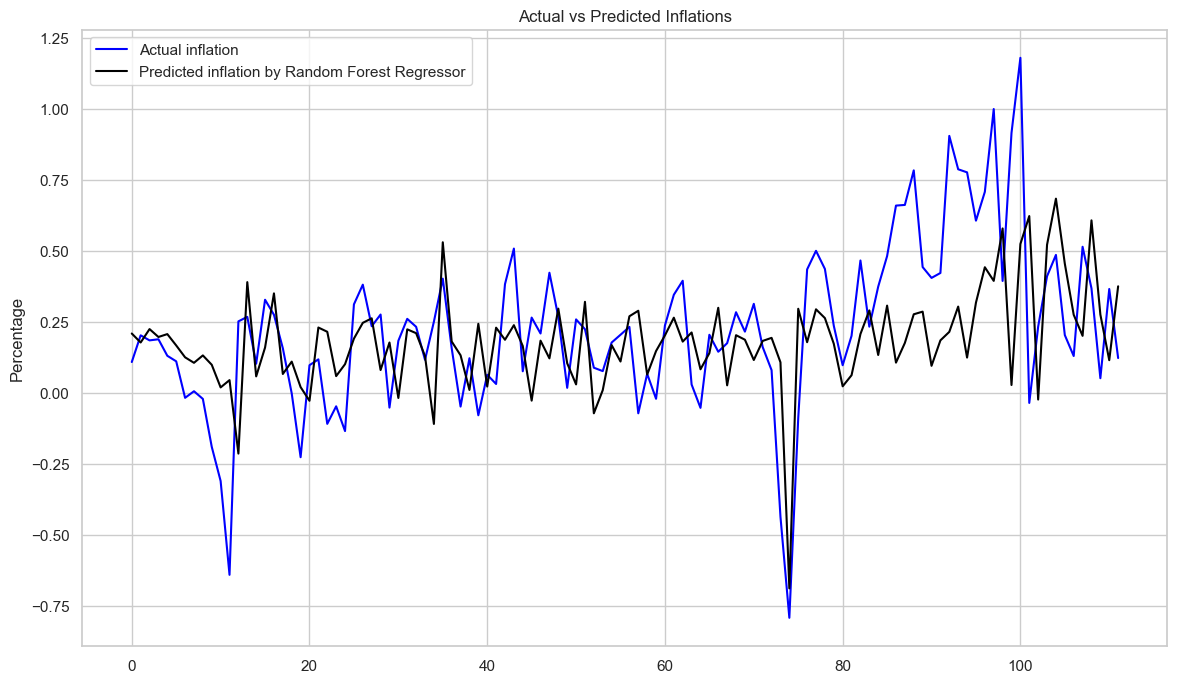

In [10]:

plt.plot(result['Actual'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result['Predicted'], linestyle='-', color='black', label='Predicted inflation by Random Forest Regressor')
plt.ylabel('Percentage')
plt.title('Actual vs Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
print("MSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=True))
print("RMSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=False))
print("Correlation: ")
print(result.corr())
print("R2: ")
print(metrics.r2_score(y_test_list, y_pred_list))

MSE: 
0.0731796484149176
RMSE: 
0.2705173717433274
Correlation: 
             Actual  Predicted
Actual     1.000000   0.435865
Predicted  0.435865   1.000000
R2: 
0.1472683782378731


# Discussion: Further attempts to reduce overfitting of RF

According to literature, RF is the best model for inflation task. However, the RF in our model is overfitted and we therefore try to further optimise it.

I first try more hyperparameters. 

Origial hyperparameters set used for grid search are
- n_trees = [100,300,400,500] #n_estimators in RF
- n_comps = [8,10,12,14,16,18,20,22] #number of principle components for PCA
- max_d = [None,5,10] #max_depth in RF
- min_l = [1,2] #min_samples_leaf in RF
- max_f = [1.0,0.7,0.3] #max_features in RF

The optimal hyperparameters are [100, 8, None, 1, 1.0].

We noticed that the number of principle components and n_estimators in RF can be further reduced to reduce overfitting.

We first try reducing the number of principle components. 

In [18]:
# create a list of configs to try
def model_configs2():
    # define scope of configs
    
    n_trees = [100,300,400]
    n_comps = [4,6,8]
    max_d = [None,10]
    min_l = [1]
    max_f = [1.0,0.7]
        
    # create configs
    configs = list()
    for i in n_trees:
        for j in n_comps:
            for d in max_d:
                for l in min_l:
                    for f in max_f:
                        cfg = [i, j, d, l, f]
                        configs.append(cfg)
    print('Total configs: %d' % len(configs))
    return configs

In [19]:
cfg_list = model_configs2()
# grid search
scores = grid_search(cfg_list)
print('done')

Total configs: 36
 > 0.313
> Model[[100, 4, None, 1, 1.0]] 0.313
 > 0.308
> Model[[100, 4, None, 1, 0.7]] 0.308
 > 0.313
> Model[[100, 4, 10, 1, 1.0]] 0.313
 > 0.306
> Model[[100, 4, 10, 1, 0.7]] 0.306
 > 0.281
> Model[[100, 6, None, 1, 1.0]] 0.281
 > 0.288
> Model[[100, 6, None, 1, 0.7]] 0.288
 > 0.281
> Model[[100, 6, 10, 1, 1.0]] 0.281
 > 0.287
> Model[[100, 6, 10, 1, 0.7]] 0.287
 > 0.280
> Model[[100, 8, None, 1, 1.0]] 0.280
 > 0.289
> Model[[100, 8, None, 1, 0.7]] 0.289
 > 0.281
> Model[[100, 8, 10, 1, 1.0]] 0.281
 > 0.289
> Model[[100, 8, 10, 1, 0.7]] 0.289
 > 0.309
> Model[[300, 4, None, 1, 1.0]] 0.309
 > 0.306
> Model[[300, 4, None, 1, 0.7]] 0.306
 > 0.308
> Model[[300, 4, 10, 1, 1.0]] 0.308
 > 0.304
> Model[[300, 4, 10, 1, 0.7]] 0.304
 > 0.281
> Model[[300, 6, None, 1, 1.0]] 0.281
 > 0.289
> Model[[300, 6, None, 1, 0.7]] 0.289
 > 0.282
> Model[[300, 6, 10, 1, 1.0]] 0.282
 > 0.289
> Model[[300, 6, 10, 1, 0.7]] 0.289
 > 0.281
> Model[[300, 8, None, 1, 1.0]] 0.281
 > 0.287
> Mode

In [20]:
scores

[('[100, 4, 10, 1, 1.0]', 0.3133402472429942),
 ('[100, 4, None, 1, 1.0]', 0.312797708075761),
 ('[300, 4, None, 1, 1.0]', 0.30905257747440856),
 ('[300, 4, 10, 1, 1.0]', 0.3084572552147519),
 ('[100, 4, None, 1, 0.7]', 0.3076056253531895),
 ('[400, 4, None, 1, 1.0]', 0.30696661293001953),
 ('[400, 4, 10, 1, 1.0]', 0.3068485431026829),
 ('[400, 4, None, 1, 0.7]', 0.3060396802437606),
 ('[100, 4, 10, 1, 0.7]', 0.30571221851518376),
 ('[300, 4, None, 1, 0.7]', 0.3056768836934741),
 ('[400, 4, 10, 1, 0.7]', 0.30502059593667774),
 ('[300, 4, 10, 1, 0.7]', 0.3041015722120981),
 ('[100, 8, 10, 1, 0.7]', 0.28918737666281147),
 ('[100, 8, None, 1, 0.7]', 0.28895345576643433),
 ('[300, 6, 10, 1, 0.7]', 0.2888804103443559),
 ('[300, 6, None, 1, 0.7]', 0.288715980305227),
 ('[400, 6, 10, 1, 0.7]', 0.2883543295418364),
 ('[100, 6, None, 1, 0.7]', 0.2883349552129665),
 ('[300, 8, None, 1, 0.7]', 0.287306032138893),
 ('[400, 6, None, 1, 0.7]', 0.2872654995803835),
 ('[100, 6, 10, 1, 0.7]', 0.2872073

The original number, 8 seems to be the optimal hyperparameters. 

We then try reducing n_estimators in RF.

In [21]:
# create a list of configs to try
def model_configs3():
    # define scope of configs
    
    n_trees = [50,70,100]
    n_comps = [8]
    max_d = [None,10]
    min_l = [1]
    max_f = [1.0]
        
    # create configs
    configs = list()
    for i in n_trees:
        for j in n_comps:
            for d in max_d:
                for l in min_l:
                    for f in max_f:
                        cfg = [i, j, d, l, f]
                        configs.append(cfg)
    print('Total configs: %d' % len(configs))
    return configs

In [22]:
cfg_list = model_configs3()
# grid search
scores = grid_search(cfg_list)
print('done')
scores

Total configs: 6
 > 0.279
> Model[[50, 8, None, 1, 1.0]] 0.279
 > 0.282
> Model[[50, 8, 10, 1, 1.0]] 0.282
 > 0.280
> Model[[70, 8, None, 1, 1.0]] 0.280
 > 0.281
> Model[[70, 8, 10, 1, 1.0]] 0.281
 > 0.280
> Model[[100, 8, None, 1, 1.0]] 0.280
 > 0.281
> Model[[100, 8, 10, 1, 1.0]] 0.281
done


[('[50, 8, 10, 1, 1.0]', 0.28229911605526853),
 ('[100, 8, 10, 1, 1.0]', 0.28135946862979105),
 ('[70, 8, 10, 1, 1.0]', 0.28108848419780574),
 ('[70, 8, None, 1, 1.0]', 0.2799632584644741),
 ('[100, 8, None, 1, 1.0]', 0.2798721819559685),
 ('[50, 8, None, 1, 1.0]', 0.2793518225050808)]

We find a better model when n_estimators in RF is reduced to 50, which is still the minimum n_estimators we have tried. Therefore, here we try an even smaller number (30) and here we also try other possible values of min_l and max_f too.

In [29]:
# create a list of configs to try
def model_configs5():
    # define scope of configs
    
    n_trees = [30,50]
    n_comps = [8]
    max_d = [None, 10]
    min_l = [1,5]
    max_f = [1.0,0.5,0.3]
        
    # create configs
    configs = list()
    for i in n_trees:
        for j in n_comps:
            for d in max_d:
                for l in min_l:
                    for f in max_f:
                        cfg = [i, j, d, l, f]
                        configs.append(cfg)
    print('Total configs: %d' % len(configs))
    return configs

cfg_list = model_configs5()
# grid search
scores = grid_search(cfg_list)
print('done')
scores

Total configs: 24
 > 0.269
> Model[[30, 8, None, 1, 1.0]] 0.269
 > 0.261
> Model[[30, 8, None, 1, 0.5]] 0.261
 > 0.266
> Model[[30, 8, None, 1, 0.3]] 0.266
 > 0.271
> Model[[30, 8, None, 5, 1.0]] 0.271
 > 0.267
> Model[[30, 8, None, 5, 0.5]] 0.267
 > 0.276
> Model[[30, 8, None, 5, 0.3]] 0.276
 > 0.272
> Model[[30, 8, 10, 1, 1.0]] 0.272
 > 0.264
> Model[[30, 8, 10, 1, 0.5]] 0.264
 > 0.264
> Model[[30, 8, 10, 1, 0.3]] 0.264
 > 0.270
> Model[[30, 8, 10, 5, 1.0]] 0.270
 > 0.269
> Model[[30, 8, 10, 5, 0.5]] 0.269
 > 0.276
> Model[[30, 8, 10, 5, 0.3]] 0.276
 > 0.271
> Model[[50, 8, None, 1, 1.0]] 0.271
 > 0.264
> Model[[50, 8, None, 1, 0.5]] 0.264
 > 0.269
> Model[[50, 8, None, 1, 0.3]] 0.269
 > 0.272
> Model[[50, 8, None, 5, 1.0]] 0.272
 > 0.268
> Model[[50, 8, None, 5, 0.5]] 0.268
 > 0.277
> Model[[50, 8, None, 5, 0.3]] 0.277
 > 0.271
> Model[[50, 8, 10, 1, 1.0]] 0.271
 > 0.263
> Model[[50, 8, 10, 1, 0.5]] 0.263
 > 0.266
> Model[[50, 8, 10, 1, 0.3]] 0.266
 > 0.272
> Model[[50, 8, 10, 5, 1.

[('[50, 8, None, 5, 0.3]', 0.276673660619533),
 ('[50, 8, 10, 5, 0.3]', 0.2763564945469152),
 ('[30, 8, None, 5, 0.3]', 0.27614470081232795),
 ('[30, 8, 10, 5, 0.3]', 0.2760548660084666),
 ('[50, 8, None, 5, 1.0]', 0.27163835311772794),
 ('[50, 8, 10, 5, 1.0]', 0.27158635605197384),
 ('[30, 8, 10, 1, 1.0]', 0.2715132812077759),
 ('[50, 8, 10, 1, 1.0]', 0.27106709434462384),
 ('[50, 8, None, 1, 1.0]', 0.27064132721620254),
 ('[30, 8, None, 5, 1.0]', 0.270620199916414),
 ('[30, 8, 10, 5, 1.0]', 0.2704636102726383),
 ('[30, 8, None, 1, 1.0]', 0.2694189235137294),
 ('[50, 8, None, 1, 0.3]', 0.26895125383516993),
 ('[50, 8, 10, 5, 0.5]', 0.2685424062297754),
 ('[30, 8, 10, 5, 0.5]', 0.2685400059971243),
 ('[50, 8, None, 5, 0.5]', 0.268310987762767),
 ('[30, 8, None, 5, 0.5]', 0.2671217612277327),
 ('[50, 8, 10, 1, 0.3]', 0.26641395811966617),
 ('[30, 8, None, 1, 0.3]', 0.26617732275738065),
 ('[30, 8, 10, 1, 0.3]', 0.2642850932458313),
 ('[30, 8, 10, 1, 0.5]', 0.2641543741139345),
 ('[50, 8

We find a better model when n_estimators in RF is reduced to 30, which again is still the minimum n_estimators we have tried. Therefore, here we try an even smaller number (10 and 20) but here we fix min_l to 1 and max_f to 0.5 as the top 4 performers models in our last trail all have min_l = 1 and max_f = 0.5.

In [32]:
# create a list of configs to try
def model_configs6():
    # define scope of configs
    
    n_trees = [10,20,30]
    n_comps = [8]
    max_d = [None, 10]
    min_l = [1]
    max_f = [0.5]
        
    # create configs
    configs = list()
    for i in n_trees:
        for j in n_comps:
            for d in max_d:
                for l in min_l:
                    for f in max_f:
                        cfg = [i, j, d, l, f]
                        configs.append(cfg)
    print('Total configs: %d' % len(configs))
    return configs

cfg_list = model_configs6()
# grid search
scores = grid_search(cfg_list)
print('done')
scores

Total configs: 6
 > 0.274
> Model[[10, 8, None, 1, 0.5]] 0.274
 > 0.274
> Model[[10, 8, 10, 1, 0.5]] 0.274
 > 0.263
> Model[[20, 8, None, 1, 0.5]] 0.263
 > 0.269
> Model[[20, 8, 10, 1, 0.5]] 0.269
 > 0.261
> Model[[30, 8, None, 1, 0.5]] 0.261
 > 0.264
> Model[[30, 8, 10, 1, 0.5]] 0.264
done


[('[10, 8, None, 1, 0.5]', 0.27432855249932675),
 ('[10, 8, 10, 1, 0.5]', 0.2737406246188623),
 ('[20, 8, 10, 1, 0.5]', 0.26925038571188536),
 ('[30, 8, 10, 1, 0.5]', 0.2641543741139345),
 ('[20, 8, None, 1, 0.5]', 0.26269396105702925),
 ('[30, 8, None, 1, 0.5]', 0.26126515646027626)]

30 is still the best n_estimators and reducing it does not yield a lower RMSE.

We now treat it as our new sets of hyperparameters and re-calcualte our new RMSE, correlation and R2.

In [30]:
start=time.time()   

steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('pca', PCA(n_components=8, random_state=1)),
                 ('rfr', RandomForestRegressor(n_estimators=30, max_depth=None, 
                                               min_samples_leaf=1, max_features=0.5, random_state=1))
                ]

pipeline_final = Pipeline(steps_final)

n_train = int(len(x)*0.7)  

n_records = len(x)

y_test_list = []
    
y_pred_list = []

train_error = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = x[j:i], x[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    
    train_error.append(metrics.mean_squared_error(y_train, y_train_pred, squared=False))

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1

print("done")

end=time.time()

print("Running Time:", end - start)

print("Training error: ", np.mean(train_error))

done
Running Time: 16.79807996749878
Training error:  0.09847159704478646


In [31]:
n_forecast = n_records-n_train
pd.options.display.max_rows=300
result = pd.DataFrame({'Actual':y_test_list, 'Predicted': y_pred_list}, columns=['Actual', 'Predicted'])
result

,Actual,Predicted
0,0.110017,0.211390
1,0.203997,0.170483
2,0.186245,0.222243
3,0.190120,0.152115
4,0.132026,0.204000
5,0.112485,0.188558
6,-0.016001,0.145110
7,0.007159,0.186549
8,-0.019793,0.159010
9,-0.188443,0.092311


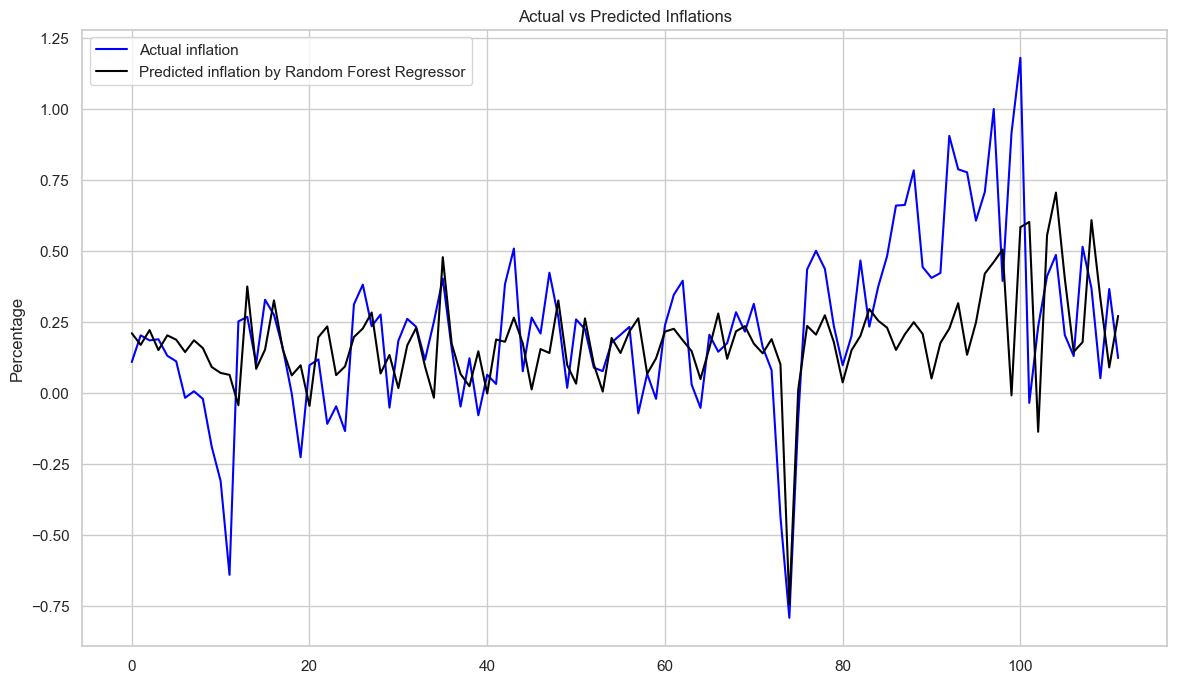

In [32]:

plt.plot(result['Actual'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result['Predicted'], linestyle='-', color='black', label='Predicted inflation by Random Forest Regressor')
plt.ylabel('Percentage')
plt.title('Actual vs Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
print("MSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=True))
print("RMSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=False))
print("Correlation: ")
print(result.corr())
print("R2: ")
print(metrics.r2_score(y_test_list, y_pred_list))

MSE: 
0.06825948198021264
RMSE: 
0.26126515646027626
Correlation: 
             Actual  Predicted
Actual     1.000000   0.484588
Predicted  0.484588   1.000000
R2: 
0.20460100546528492


There is no significant improvements with finetunning our hyperparameters. Therefore, we try another methods to reduce overfitting: increase data instances.

The second attept I made is to use this optimal model and try to increase the data instances by increasing train:test split from 7:3 to 8:2.

In [34]:
start=time.time()   

steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('pca', PCA(n_components=8, random_state=1)),
                 ('rfr', RandomForestRegressor(n_estimators=30, max_depth=None, 
                                               min_samples_leaf=1, max_features=0.5, random_state=1))
                ]

pipeline_final = Pipeline(steps_final)

n_train = int(len(x)*0.8)  #train : test = 8:2

n_records = len(x)

y_test_list = []
    
y_pred_list = []

train_error = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = x[j:i], x[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    
    train_error.append(metrics.mean_squared_error(y_train, y_train_pred, squared=False))

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1

print("done")

end=time.time()

print("Running Time:", end - start)

print("Training error: ", np.mean(train_error))

done
Running Time: 13.17986011505127
Training error:  0.09616838901778643


In [35]:
n_forecast = n_records-n_train
pd.options.display.max_rows=300
result = pd.DataFrame({'Actual':y_test_list, 'Predicted': y_pred_list}, columns=['Actual', 'Predicted'])
result

,Actual,Predicted
0,-0.046731,-0.013915
1,0.123339,0.026710
2,-0.077428,0.274067
3,0.065142,-0.036794
4,0.032760,0.240559
5,0.384124,0.168369
6,0.509340,0.248369
7,0.077475,0.187749
8,0.266445,0.080314
9,0.210467,0.245413


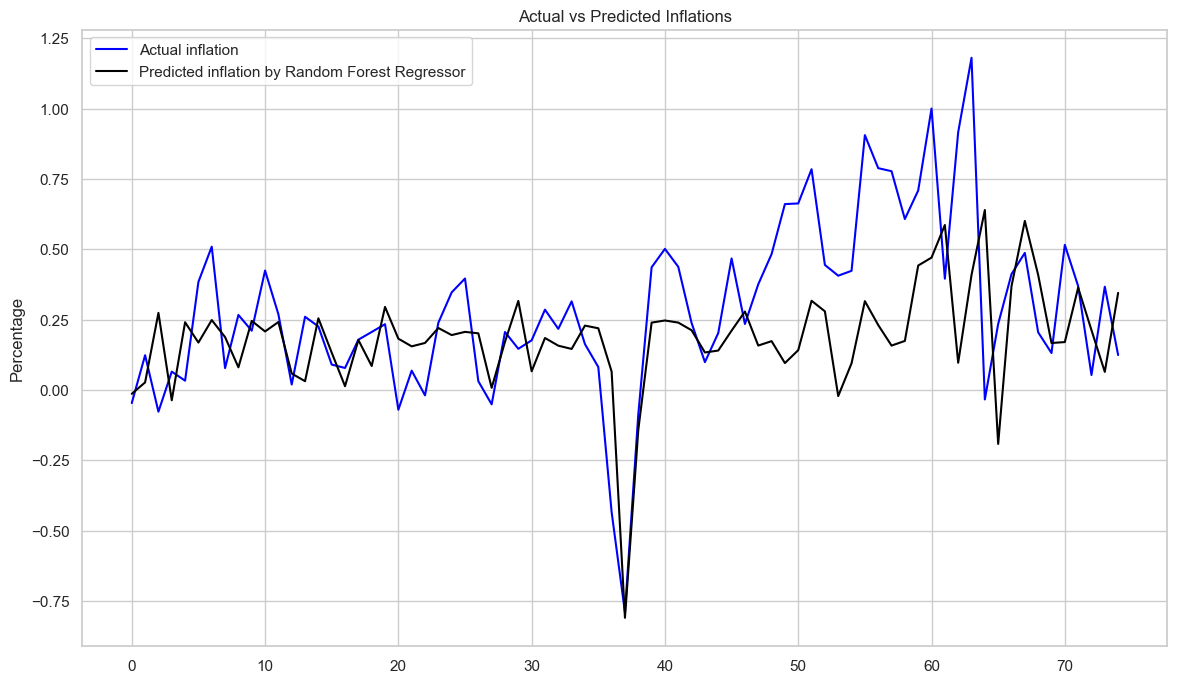

In [36]:

plt.plot(result['Actual'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result['Predicted'], linestyle='-', color='black', label='Predicted inflation by Random Forest Regressor')
plt.ylabel('Percentage')
plt.title('Actual vs Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
print("MSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=True))
print("RMSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=False))
print("Correlation: ")
print(result.corr())
print("R2: ")
print(metrics.r2_score(y_test_list, y_pred_list))

MSE: 
0.08523949052520081
RMSE: 
0.2919580287048137
Correlation: 
             Actual  Predicted
Actual     1.000000   0.482539
Predicted  0.482539   1.000000
R2: 
0.09940998201467077


Suprisingly, the RMSE increases with more training data instances. However, this also implies that RMSE might increase if we decrease train : split.

In [38]:
start=time.time()   

steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('pca', PCA(n_components=8, random_state=1)),
                 ('rfr', RandomForestRegressor(n_estimators=30, max_depth=None, 
                                               min_samples_leaf=1, max_features=0.5, random_state=1))
                ]

pipeline_final = Pipeline(steps_final)

n_train = int(len(x)*0.6)  

n_records = len(x)

y_test_list = []
    
y_pred_list = []

train_error = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = x[j:i], x[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    
    train_error.append(metrics.mean_squared_error(y_train, y_train_pred, squared=False))

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1

print("done")

end=time.time()

print("Running Time:", end - start)

print("Training error: ", np.mean(train_error))

done
Running Time: 20.328781843185425
Training error:  0.1031468011858755


In [39]:
n_forecast = n_records-n_train
pd.options.display.max_rows=300
result = pd.DataFrame({'Actual':y_test_list, 'Predicted': y_pred_list}, columns=['Actual', 'Predicted'])
result

,Actual,Predicted
0,0.400853,0.311207
1,0.323779,0.240355
2,0.320932,0.294603
3,0.516021,0.290082
4,0.468312,0.127697
5,0.317666,0.403761
6,0.000000,0.200151
7,0.261661,0.135753
8,0.314950,0.247151
9,0.216919,0.111934


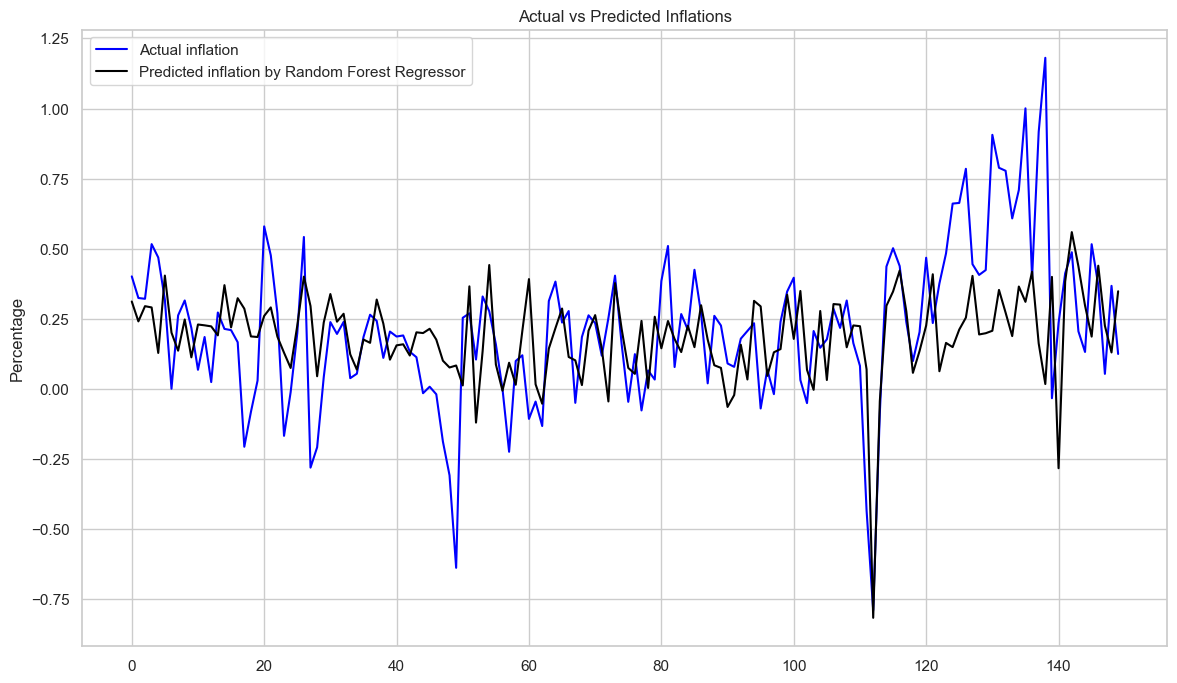

In [40]:

plt.plot(result['Actual'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result['Predicted'], linestyle='-', color='black', label='Predicted inflation by Random Forest Regressor')
plt.ylabel('Percentage')
plt.title('Actual vs Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()

In [41]:
print("MSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=True))
print("RMSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=False))
print("Correlation: ")
print(result.corr())
print("R2: ")
print(metrics.r2_score(y_test_list, y_pred_list))

MSE: 
0.06710142906376419
RMSE: 
0.25903943534482193
Correlation: 
             Actual  Predicted
Actual     1.000000   0.386548
Predicted  0.386548   1.000000
R2: 
0.10951674360995844


The RMSE decreases from 0.26126515646027626 to 0.25903943534482193, supporting a lower train : test split is better.

How about an ever lower train : test split, says 5:5?

In [12]:
start=time.time()   

steps_final = [('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)),
                 ('pca', PCA(n_components=8, random_state=1)),
                 ('rfr', RandomForestRegressor(n_estimators=30, max_depth=None, 
                                               min_samples_leaf=1, max_features=0.5, random_state=1))
                ]

pipeline_final = Pipeline(steps_final)

n_train = int(len(x)*0.5)  

n_records = len(x)

y_test_list = []
    
y_pred_list = []

train_error = []

j = 0

for i in range(n_train, n_records):
    
    X_train, X_test, y_train, y_test = x[j:i], x[i:i+1], y[j:i], y[i:i+1]
        
    model = pipeline_final.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    
    train_error.append(metrics.mean_squared_error(y_train, y_train_pred, squared=False))

    y_pred = model.predict(X_test)
    
    y_pred_list.extend(y_pred)
    
    y_test_list.extend(y_test)

    j += 1

print("done")

end=time.time()

print("Running Time:", end - start)

print("Training error: ", np.mean(train_error))

done
Running Time: 22.814141988754272
Training error:  0.10580287798529604


In [13]:
n_forecast = n_records-n_train
pd.options.display.max_rows=300
result = pd.DataFrame({'Actual':y_test_list, 'Predicted': y_pred_list}, columns=['Actual', 'Predicted'])
result

,Actual,Predicted
0,0.782816,0.249727
1,0.289382,0.298027
2,0.344178,0.238225
3,0.241491,0.389586
4,0.357164,0.204339
5,0.231171,0.271436
6,0.590005,0.222660
7,1.042372,0.374689
8,0.711607,0.639356
9,-0.148958,0.534838


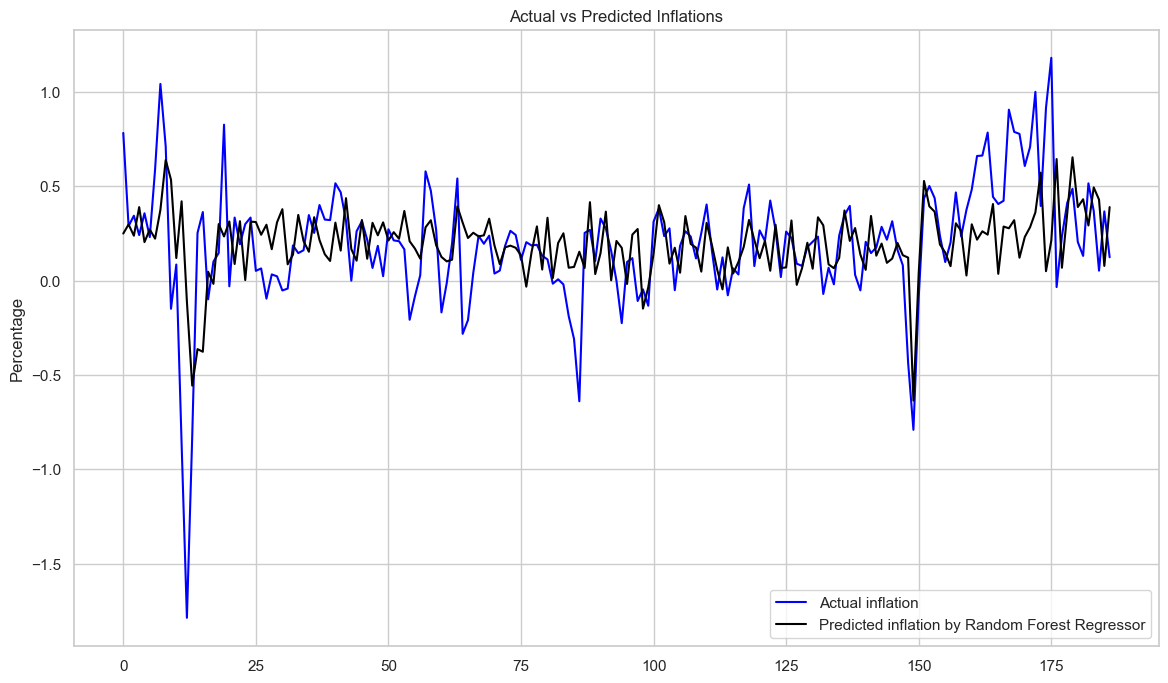

In [14]:

plt.plot(result['Actual'], linestyle='-', color='blue', label='Actual inflation')
plt.plot(result['Predicted'], linestyle='-', color='black', label='Predicted inflation by Random Forest Regressor')
plt.ylabel('Percentage')
plt.title('Actual vs Predicted Inflations')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
print("MSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=True))
print("RMSE: ")
print(metrics.mean_squared_error(y_test_list, y_pred_list, squared=False))
print("Correlation: ")
print(result.corr())
print("R2: ")
print(metrics.r2_score(y_test_list, y_pred_list))

MSE: 
0.09830454484684792
RMSE: 
0.3135355559531453
Correlation: 
             Actual  Predicted
Actual     1.000000   0.343919
Predicted  0.343919   1.000000
R2: 
0.08468858084274455


This time the RMSE increases to 0.3135355559531453, suggesting that 6:4 is the best train : test split.